<a href="https://colab.research.google.com/github/jarrelg/ENDG-511-Final-Project/blob/main/ENDG_511_Final_Project_Fayez_%26_Jarrel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ENDG 511 Final Project**
# **Real-Time Clothing Recognition for the Visually Impaired and IoT Devices**
# Authors: Fayez Khan (30107199) and Jarrel Gumpal (30069206)


## Problem Statement
This project aims to develop a camera-based clothing recognition machine learning model capable of classifying essential clothing features, including garment type (e.g., shirts, pants, sweaters), color (e.g., red, white, black), fabric shade (light or dark), and more. The system will help users properly segregate clothing batches, ensuring effective washing and preventing damage to all articles of clothing. Additionally, the developed model can be further integrated into robotic aids to automate specific laundry tasks, such as initial clothing separation and folding, enhancing accessibility and independence for visually impaired individuals.

## Objectives
**Minimal Achievable:**
* Detect and identify **light-shaded, dark-shaded, and white** clothing using a pre-trained model.

* Two outputs of the classifier: “Light” or “Dark”.

**Advanced:**
* Improve detection of clothing/article type
 * Shirts, Sweaters, Jackets, Pants, Denim Jeans, Shorts, Socks, Undergarments
* Include detection of clothing features specifically suitable for modern washing machine modes
 * Normal Wash
 * Heavy-Duty
 * Delicates
* Include classification of how affected certain items are:
 * Heavily Wrinkled (Perm-Press)
 * Deep Stains on Whites (Bleach Wash)


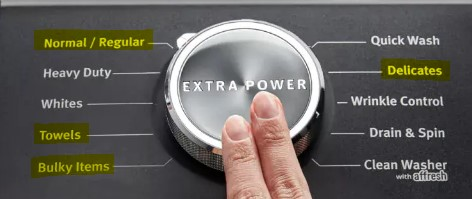

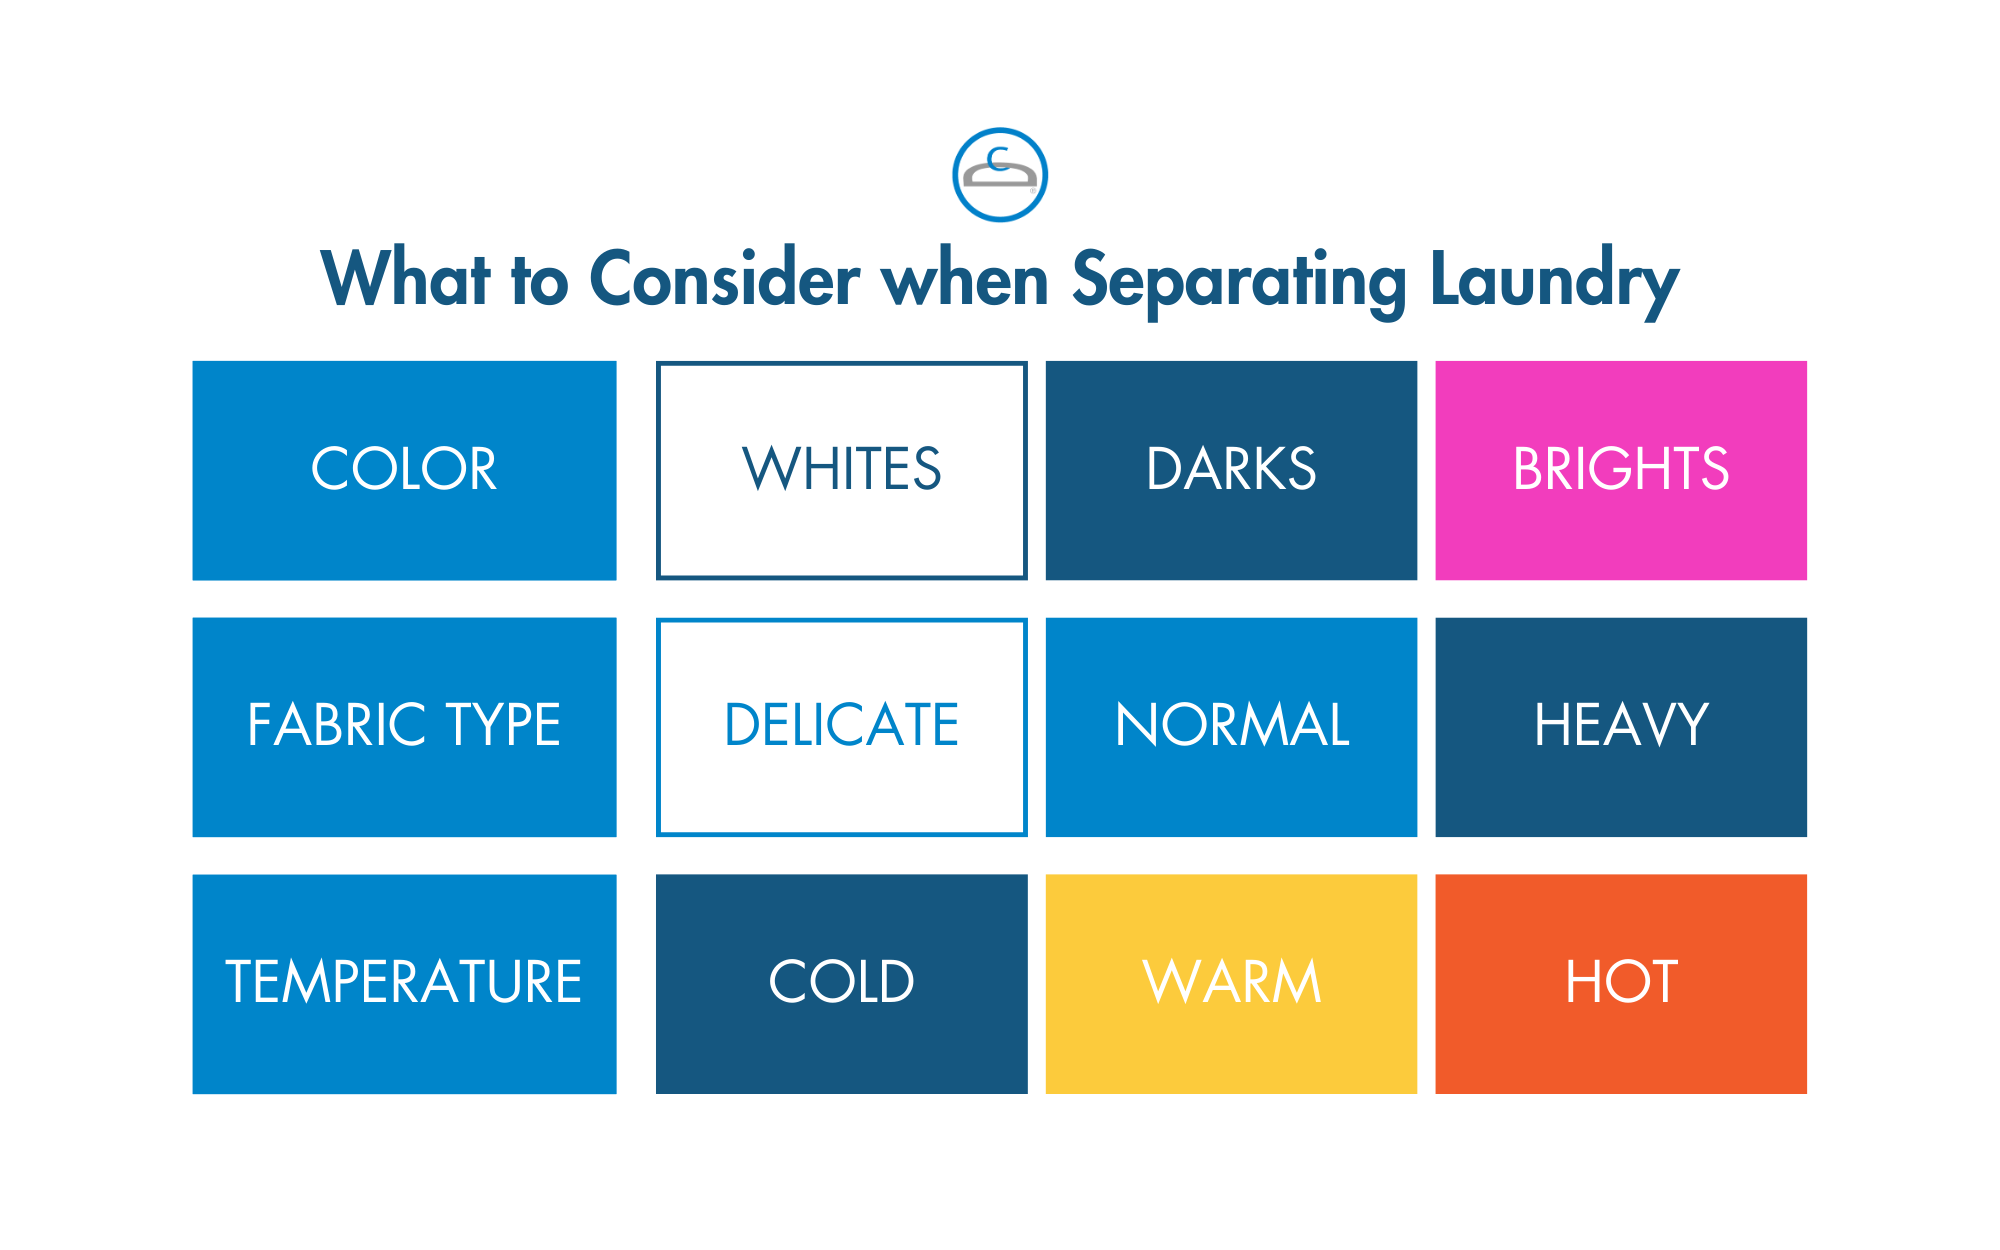
https://cdonepricecleaners.com/how-to-separate-laundry-and-sort-clothes/

# **Minimum Achievable: Light & Dark Classification**

# Importing Modules:

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import time
import tempfile

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


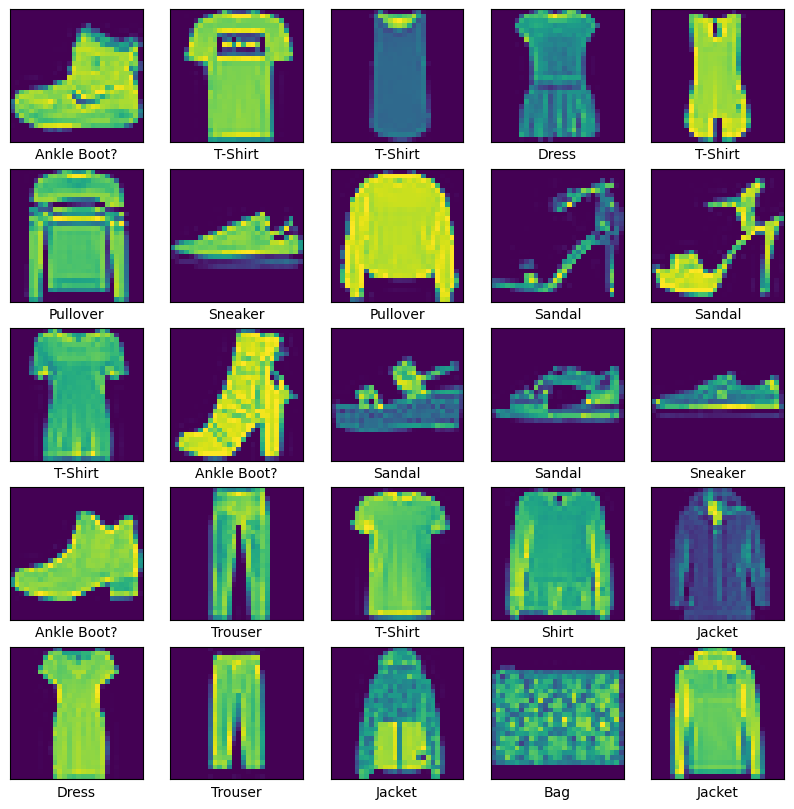

In [ ]:
class_names = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Jacket',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot?']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
! pip install kaggle

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp /content/drive/MyDrive/511projectdata/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install torch==2.0.1 torchvision==0.15.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 109.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install numpy

Found 7510 files belonging to 15 classes.
Using 6008 files for training.
Found 7510 files belonging to 15 classes.
Using 1502 files for validation.


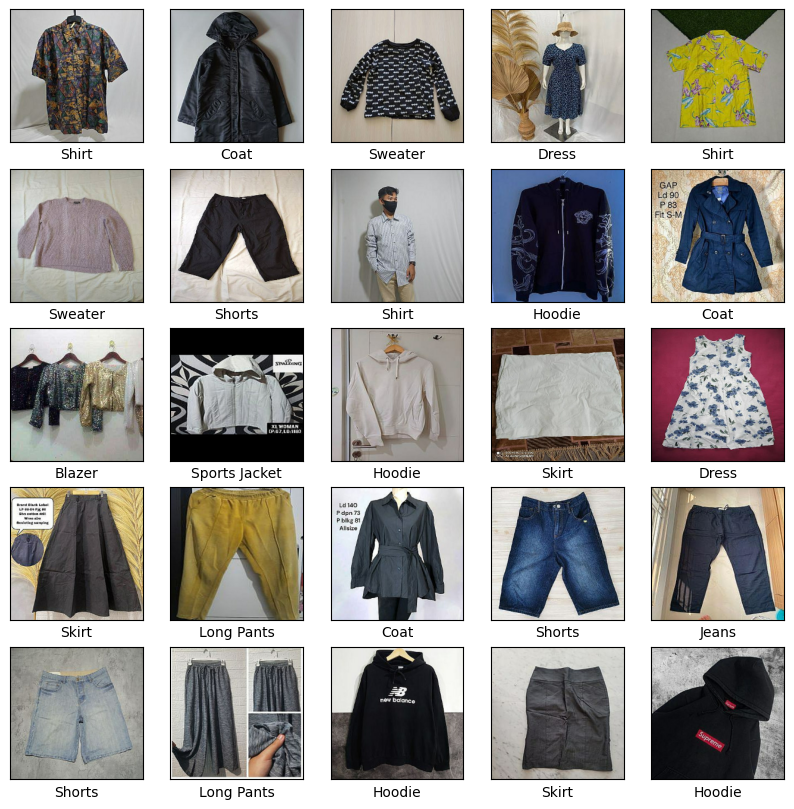

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import os
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
import cv2
import numpy as np

# Mount Google Drive
#from google.colab import drive

#drive.mount('/content/drive')

# Define dataset directory
data_dir = '/content/drive/MyDrive/511projectdata/Clothes_Dataset'

# Define class names
class_names = ['Blazer', 'Coat', 'Denim Jacket', 'Dress', 'Hoodie', 'Jacket', 'Jeans', 'Long Pants', 'Polo', 'Shirt', 'Shorts', 'Skirt', 'Sports Jacket', 'Sweater', 'T-shirt']

# Load dataset using image_dataset_from_directory
batch_size = 32
img_size = (224, 224)

train_dataset = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_dataset = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

# Normalize pixel values
normalization_layer = layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

# Function to extract lightness from LAB color space
def get_lightness(image):
    """Convert image to LAB and return lightness value"""
    image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)  # Convert to LAB
    L, _, _ = cv2.split(image)  # Extract Lightness channel
    return np.mean(L)  # Return average lightness

def label_light_dark(image, threshold=128):
    """Classify image as 'Light' or 'Dark' based on Lightness"""
    lightness = get_lightness(image)
    return "Light" if lightness > threshold else "Dark"

# Visualize training images
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].numpy())
        plt.xlabel(class_names[labels[i].numpy()])
plt.show()

In [ ]:
#Instantiating light and dark dataset for training
# Function to extract lightness from LAB color space
def get_lightness(image):
    """Convert image to LAB and return lightness value"""
    image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)  # Convert to LAB
    L, _, _ = cv2.split(image)  # Extract Lightness channel
    return np.mean(L)  # Return average lightness

def label_light_dark(image, threshold=128):
    """Classify image as 'Light' or 'Dark' based on Lightness"""
    lightness = get_lightness(image)
    return "Light" if lightness > threshold else "Dark"

# Create new dataset structure
if not os.path.exists(new_data_dir):
    os.makedirs(new_data_dir)
    for class_name in class_names:
        os.makedirs(os.path.join(new_data_dir, f"{class_name}_Light"), exist_ok=True)
        os.makedirs(os.path.join(new_data_dir, f"{class_name}_Dark"), exist_ok=True)

# Process and Move Images to New Dataset Folder
for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    if os.path.exists(class_dir):
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)

            # Load image
            image = cv2.imread(img_path)
            if image is None:
                continue  # Skip unreadable images

            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
            category = label_light_dark(image)  # Get Light/Dark Label

            # Define new path
            new_class_dir = os.path.join(new_data_dir, f"{class_name}_{category}")
            shutil.copy(img_path, os.path.join(new_class_dir, img_name))  # Copy image to new folder

print("Dataset restructuring complete!")

Found 3691 files belonging to 24 classes.
Using 2953 files for training.
Found 3691 files belonging to 24 classes.
Using 738 files for validation.


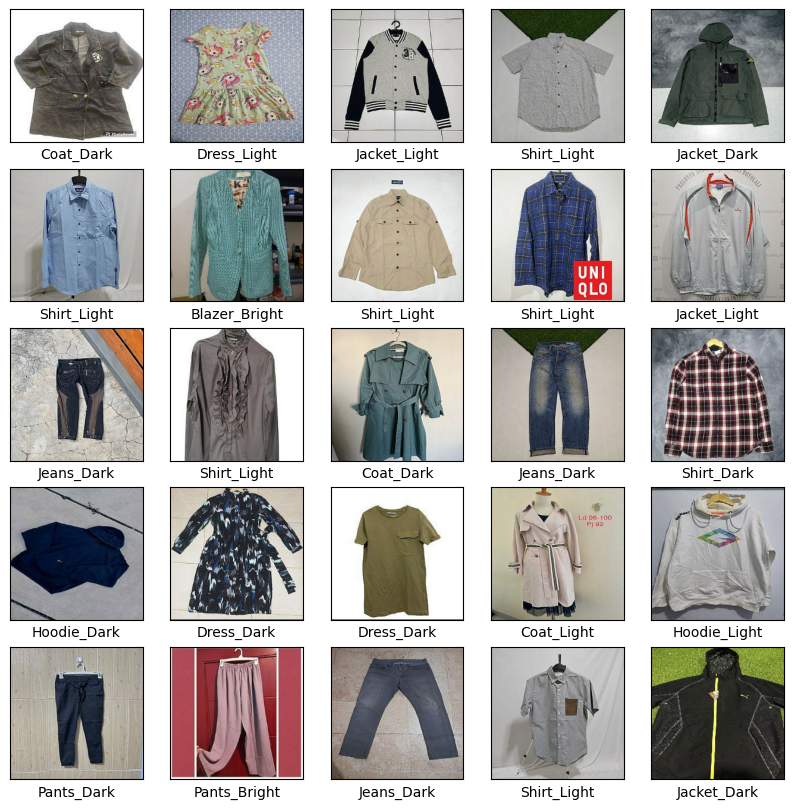

In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import shutil
import cv2
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define dataset directory (Google Drive Path)
#data_dir = '/content/drive/MyDrive/511projectdata/Clothes_Dataset'
new_data_dir = '/content/drive/MyDrive/offrun'  # New structured dataset

# Define class names
class_names = [
    "Blazer_Bright",
    "Blazer_Dark",
    "Blazer_Light",
    "Coat_Bright",
    "Coat_Dark",
    "Coat_Light",
    "Dress_Bright",
    "Dress_Dark",
    "Dress_Light",
    "Hoodie_Bright",
    "Hoodie_Dark",
    "Hoodie_Light",
    "Jacket_Bright",
    "Jacket_Dark",
    "Jacket_Light",
    "Jeans_Bright",
    "Jeans_Dark",
    "Jeans_Light",
    "Pants_Bright",
    "Pants_Dark",
    "Pants_Light",
    "Shirt_Bright",
    "Shirt_Dark",
    "Shirt_Light"
]



# Load dataset with new structure
batch_size = 32
img_size = (224, 224)

train_dataset = image_dataset_from_directory(
    new_data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_dataset = image_dataset_from_directory(
    new_data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

# Normalize pixel values
normalization_layer = layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

# Visualize training images
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].numpy())
        plt.xlabel(class_names[labels[i].numpy()])
plt.show()


In [34]:
print(len(class_names))

24


In [19]:
# Check if folder names match class_names
import os
folder_names = sorted(os.listdir(new_data_dir))
print("Folders found:", folder_names)
print("Expected classes:", class_names)

# Check for mismatches
set(folder_names) - set(class_names)

Folders found: ['Blazer_Bright', 'Blazer_Dark', 'Blazer_Light', 'Coat_Bright', 'Coat_Dark', 'Coat_Light', 'Dress_Bright', 'Dress_Dark', 'Dress_Light', 'Hoodie_Bright', 'Hoodie_Dark', 'Hoodie_Light', 'Jacket_Bright', 'Jacket_Dark', 'Jacket_Light', 'Jeans_Bright', 'Jeans_Dark', 'Jeans_Light', 'Pants_Bright', 'Pants_Dark', 'Pants_Light', 'Shirt_Bright', 'Shirt_Dark', 'Shirt_Light', 'Shorts_Bright', 'Shorts_Dark', 'Shorts_Light', 'Skirt_Bright', 'Skirt_Dark', 'Skirt_Light', 'Sports Jacket_Dark', 'Sports Jacket_Light', 'Sports_Jacket_Bright', 'Sweater_Bright', 'Sweater_Dark', 'Sweater_Light', 'T-Shirt_Bright', 'T-shirt_Dark', 'T-shirt_Light']
Expected classes: ['Blazer_Bright', 'Blazer_Dark', 'Blazer_Light', 'Coat_Bright', 'Coat_Dark', 'Coat_Light', 'Dress_Bright', 'Dress_Dark', 'Dress_Light', 'Hoodie_Bright', 'Hoodie_Dark', 'Hoodie_Light', 'Jacket_Bright', 'Jacket_Dark', 'Jacket_Light', 'Jeans_Bright', 'Jeans_Dark', 'Jeans_Light', 'Pants_Bright', 'Pants_Dark', 'Pants_Light', 'Skirt_Bright'

{'Sports_Jacket_Bright', 'T-Shirt_Bright'}

In [23]:
# Count samples per class
class_counts = np.zeros(len(class_names))
for _, labels in train_dataset:
    for label in labels.numpy():
        class_counts[label] += 1
plt.bar(range(len(class_names)), class_counts)
plt.xticks(range(len(class_names)), class_names, rotation=90)
plt.show()

KeyboardInterrupt: 

In [38]:
# After your dataset loading code...

# Data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
])

# Transfer learning with EfficientNet
base_model = tf.keras.applications.EfficientNetB0(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

# Build model
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu', kernel_regularizer='l2')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(len(class_names), activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

# Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=3)
]

# Train
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=5,
    callbacks=callbacks
)

# Fine-tuning
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_fine = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,
    callbacks=callbacks
)

Epoch 1/5
18/93 ━━━━━━━━━━━━━━━━━━━━ 4:32 4s/step - accuracy: 0.0660 - loss: 7.7007

KeyboardInterrupt: 

In [ ]:
!pip install rembg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.0 MB/s eta 0:00:00


In [ ]:
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.7 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt

# Define dataset directory (using a raw string for Windows paths)
data_dir = r'C:\Users\Jarrel\Desktop\offrun'

# Set batch size and image size
batch_size = 32
img_size = (224, 224)

# Load dataset with an 80/20 split
raw_train_dataset = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

raw_val_dataset = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

# Retrieve class names and number of classes
class_names = raw_train_dataset.class_names
num_classes = len(class_names)
print("Classes found:", class_names)

# Define data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.1)
])

# Define normalization layer
normalization_layer = layers.Rescaling(1.0/255)

# Apply augmentation and normalization to the training dataset
train_dataset = raw_train_dataset.map(
    lambda x, y: (normalization_layer(data_augmentation(x, training=True)), y)
)
# Apply normalization only to the validation dataset
val_dataset = raw_val_dataset.map(lambda x, y: (normalization_layer(x), y))

# Load the MobileNetV2 model with pretrained ImageNet weights (exclude the top layers)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze the base model

# Create the final model by stacking our custom layers on top of the base model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model architecture
model.summary()

# Train the model
epochs = 10
history = model.fit(train_dataset, validation_data=val_dataset, epochs=epochs)

# Plot Training Results
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.show()


In [2]:
pip install torch torchvision


Note: you may need to restart the kernel to use updated packages.


In [5]:
# Install torchsummary if not already installed
%pip install torchsummary

Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install onnx onnx2pytorch torch torchvision onnxruntime torchsummary

   ---------------------------------------- 0.0/14.5 MB ? eta -:--:--
   ----- ---------------------------------- 2.1/14.5 MB 13.0 MB/s eta 0:00:01
   -------------- ------------------------- 5.2/14.5 MB 14.5 MB/s eta 0:00:01
   ------------------------ --------------- 8.9/14.5 MB 15.4 MB/s eta 0:00:01
   --------------------------------- ------ 12.3/14.5 MB 15.7 MB/s eta 0:00:01
   ---------------------------------------- 14.5/14.5 MB 15.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.8 MB ? eta -:--:--
   ------------ --------------------------- 3.7/11.8 MB 18.2 MB/s eta 0:00:01
   ------------------------- -------------- 7.6/11.8 MB 18.8 MB/s eta 0:00:01
   ---------------------------------------  11.5/11.8 MB 20.1 MB/s eta 0:00:01
   ---------------------------------------- 11.8/11.8 MB 18.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install tf2onnx

  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.3
    Uninstalling protobuf-5.29.3:
      Successfully uninstalled protobuf-5.29.3
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.18.0 requires ml-dtypes<0.5.0,>=0.4.0, but you have ml-dtypes 0.5.1 which is incompatible.
tensorflow-intel 2.18.0 requires tensorboard<2.19,>=2.18, but you have tensorboard 2.19.0 which is incompatible.
tf 1.0.3 requires protobuf<6.0.0,>=5.28.3, but you have protobuf 3.20.3 which is incompatible.


In [ ]:
import tensorflow as tf
import tf2onnx

# Load Keras model
seq_model = tf.keras.models.load_model(
    r"C:/Users/Fayez/OneDrive - University of Calgary/Desktop/UNI NOTES/fifth year/Wniter 2025/ENDG 511/Project/ENDG-511-Final-Project-1/resnet50_finetuned_model.h5"
)
# Wrap Sequential into a Functional model to make ONNX export compatible
inputs = tf.keras.Input(shape=(224, 224, 3), name="input")
outputs = seq_model(inputs)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# ✅ Convert to ONNX
onnx_model_path = "resnet50_finetuned_model.onnx"
spec = (tf.TensorSpec((None, 224, 224, 3), tf.float32, name="input"),)
model_proto, _ = tf2onnx.convert.from_keras(
    model,
    input_signature=spec,
    output_path=onnx_model_path
)

print("✅ ONNX model saved to:", onnx_model_path)


✅ ONNX model saved to: resnet50_finetuned_model.onnx


In [6]:
#🔄 2. Load ONNX into PyTorch
import onnx
from onnx2pytorch import ConvertModel
import torch
from torchsummary import summary

# Load ONNX model
onnx_model = onnx.load("resnet50_finetuned_model.onnx")
model = ConvertModel(onnx_model)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

print("\n🔍 Model loaded from ONNX and converted to PyTorch:")
print(model)




🔍 Model loaded from ONNX and converted to PyTorch:
ConvertModel(
  (Transpose_functional_15_1/sequential_27_1/resnet50_1/conv1_conv_1/convolution__6:0): Transpose()
  (Conv_Conv__223:0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (Mul_functional_15_1/sequential_27_1/resnet50_1/conv1_bn_1/batchnorm/mul_1:0): mul()
  (Add_functional_15_1/sequential_27_1/resnet50_1/conv1_bn_1/batchnorm/add_1:0): Add()
  (Relu_functional_15_1/sequential_27_1/resnet50_1/conv1_relu_1/Relu:0): ReLU(inplace=True)
  (Pad_functional_15_1/sequential_27_1/resnet50_1/pool1_pad_1/Pad:0): Pad(mode=constant, padding=None)
  (MaxPool_functional_15_1/sequential_27_1/resnet50_1/pool1_pool_1/MaxPool2d:0): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (Conv_Conv__251:0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
  (Conv_Conv__237:0): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
  (Relu_functional_15_1/sequential_27_1/resnet50_1/conv2_block1_1_r

In [12]:
#✂️ 3. Structured Pruning
import torch.nn.utils.prune as prune
import torch.nn as nn

def structured_prune_conv_layers(model, amount=0.3):
    for name, module in model.named_modules():
        if isinstance(module, nn.Conv2d) and module.out_channels >= 32:
            prune.ln_structured(module, name='weight', amount=amount, n=2, dim=0)
            prune.remove(module, 'weight')  # Apply pruning
    return model

model = structured_prune_conv_layers(model)
torch.save(model.state_dict(), "model_pruned.pth")
print("✅ Model after pruning saved as 'model_pruned.pth'")
print(model)


✅ Model after pruning saved as 'model_pruned.pth'
ConvertModel(
  (Transpose_functional_15_1/sequential_27_1/resnet50_1/conv1_conv_1/convolution__6:0): Transpose()
  (Conv_Conv__223:0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (Mul_functional_15_1/sequential_27_1/resnet50_1/conv1_bn_1/batchnorm/mul_1:0): mul()
  (Add_functional_15_1/sequential_27_1/resnet50_1/conv1_bn_1/batchnorm/add_1:0): Add()
  (Relu_functional_15_1/sequential_27_1/resnet50_1/conv1_relu_1/Relu:0): ReLU(inplace=True)
  (Pad_functional_15_1/sequential_27_1/resnet50_1/pool1_pad_1/Pad:0): Pad(mode=constant, padding=None)
  (MaxPool_functional_15_1/sequential_27_1/resnet50_1/pool1_pool_1/MaxPool2d:0): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (Conv_Conv__251:0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
  (Conv_Conv__237:0): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
  (Relu_functional_15_1/sequential_27_1/resnet50_1/conv2_block1_1_rel

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Paths
pruned_model_path = r"C:/Users/Fayez/OneDrive - University of Calgary\Desktop/UNI NOTES/fifth year/Wniter 2025/ENDG 511/Project/ENDG-511-Final-Project-1/model_pruned.pth"
dataset_path = r"C:/Users/Fayez/OneDrive - University of Calgary/Desktop/UNI NOTES/fifth year/Wniter 2025/ENDG 511/Project/offrun"
save_path = "model_pruned_finetuned_best.pth"

# 🔁 Transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# 📦 Load Dataset
full_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# Split into train/val
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# 🧠 Load Pruned Model (ResNet50)
model = models.resnet50()
model.fc = nn.Linear(model.fc.in_features, len(full_dataset.classes))

# Load pruned model weights with strict=False to handle mismatched keys
try:
    model.load_state_dict(torch.load(pruned_model_path, map_location='cpu'), strict=False)
    print("✅ Loaded pruned model successfully.")
except Exception as e:
    print(f"❌ Error loading pruned model: {e}")

model = model.to(device)

# 🎯 Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)

# 📈 Fine-tuning with best model saving
best_val_accuracy = 0.0
epochs = 10

for epoch in range(epochs):
    model.train()
    total_loss, correct, total = 0.0, 0, 0

    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} - Training"):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()
        total += labels.size(0)

    train_acc = correct / total
    avg_loss = total_loss / len(train_loader)

    # Validation
    model.eval()
    val_correct, val_total = 0, 0

    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc=f"Epoch {epoch+1}/{epochs} - Validation"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            val_correct += predicted.eq(labels).sum().item()
            val_total += labels.size(0)

    val_acc = val_correct / val_total

    # Scheduler Step
    scheduler.step()

    print(f"📘 Epoch {epoch+1}: Train Loss = {avg_loss:.4f}, Train Acc = {train_acc:.4f}, Val Acc = {val_acc:.4f}")

    # Save best model
    if val_acc > best_val_accuracy:
        best_val_accuracy = val_acc
        torch.save(model.state_dict(), save_path)
        print(f"✅ Best model saved with val accuracy: {val_acc:.4f}")

print("🏁 Training complete.")


✅ Loaded pruned model successfully.


Epoch 1/10 - Validation: 100%|██████████| 24/24 [01:15<00:00,  3.15s/it]


📘 Epoch 1: Train Loss = 2.7875, Train Acc = 0.1633, Val Acc = 0.2179
✅ Best model saved with val accuracy: 0.2179


Epoch 2/10 - Validation: 100%|██████████| 24/24 [01:36<00:00,  4.01s/it]


📘 Epoch 2: Train Loss = 2.3421, Train Acc = 0.2649, Val Acc = 0.2666
✅ Best model saved with val accuracy: 0.2666


Epoch 3/10 - Validation: 100%|██████████| 24/24 [01:18<00:00,  3.28s/it]


📘 Epoch 3: Train Loss = 2.0765, Train Acc = 0.3371, Val Acc = 0.2855
✅ Best model saved with val accuracy: 0.2855


Epoch 4/10 - Validation: 100%|██████████| 24/24 [00:40<00:00,  1.69s/it]


📘 Epoch 4: Train Loss = 1.8534, Train Acc = 0.3977, Val Acc = 0.3518
✅ Best model saved with val accuracy: 0.3518


Epoch 5/10 - Validation: 100%|██████████| 24/24 [01:41<00:00,  4.22s/it]


📘 Epoch 5: Train Loss = 1.7201, Train Acc = 0.4407, Val Acc = 0.3627
✅ Best model saved with val accuracy: 0.3627


Epoch 6/10 - Validation: 100%|██████████| 24/24 [00:50<00:00,  2.10s/it]


📘 Epoch 6: Train Loss = 1.6281, Train Acc = 0.4641, Val Acc = 0.4100
✅ Best model saved with val accuracy: 0.4100


Epoch 7/10 - Validation: 100%|██████████| 24/24 [00:39<00:00,  1.63s/it]


📘 Epoch 7: Train Loss = 1.5087, Train Acc = 0.5091, Val Acc = 0.4046


Epoch 8/10 - Validation: 100%|██████████| 24/24 [04:19<00:00, 10.80s/it]


📘 Epoch 8: Train Loss = 1.4290, Train Acc = 0.5291, Val Acc = 0.4479
✅ Best model saved with val accuracy: 0.4479


Epoch 9/10 - Validation: 100%|██████████| 24/24 [00:35<00:00,  1.46s/it]


📘 Epoch 9: Train Loss = 1.3581, Train Acc = 0.5637, Val Acc = 0.4154


Epoch 10/10 - Validation: 100%|██████████| 24/24 [00:38<00:00,  1.59s/it]


📘 Epoch 10: Train Loss = 1.2557, Train Acc = 0.6006, Val Acc = 0.4614
✅ Best model saved with val accuracy: 0.4614
🏁 Training complete.


In [16]:
#🧊 5. Static Quantization
model.eval()
model.qconfig = torch.quantization.get_default_qconfig('fbgemm')


# Prepare and convert
model_prepared = torch.quantization.prepare(model)
with torch.no_grad():
    for images, _ in train_loader:
        model_prepared(images.to(device))
        break  # calibration

model_int8 = torch.quantization.convert(model_prepared)
torch.save(model_int8.state_dict(), "model_pruned_finetuned_quantized.pth")
print("✅ Quantized model saved as 'model_pruned_finetuned_quantized.pth'")


c:\Users\Fayez\anaconda3\Lib\site-packages\torch\ao\quantization\observer.py:229: UserWarning: Please use quant_min and quant_max to specify the range for observers.                     reduce_range will be deprecated in a future release of PyTorch.
  warnings.warn(


✅ Quantized model saved as 'model_pruned_finetuned_quantized.pth'
